In [170]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
smile = pd.read_csv('SmileOn11.28.2020.csv', skiprows=2,
                    sep=None, error_bad_lines=False,skipinitialspace=True)
smile.head()

<ipython-input-86-94cf67c01a06>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  smile = pd.read_csv('SmileOn11.28.2020.csv', skiprows=2,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


In [87]:
smile.tail()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
40027,53192452,SMILE ON 60+ Registration,NaN,5/23/2018 14:11,5/23/2018 14:11,0,-1,60132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40028,67915561,SMILE ON 60+ Registration,NaN,5/15/2018 9:06,5/15/2018 9:10,4,3239813,128174,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40029,67251405,SMILE ON 60+ Clinical,NaN,5/10/2018 8:25,5/10/2018 8:26,1,2631417,131347,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,Yes,Yes,NaN,NaN
40030,63063150,SMILE ON 60+ Clinical,NaN,5/1/2018 8:14,5/1/2018 8:24,10,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40031,70839903,SMILE ON 60+ Clinical,NaN,2/14/2018 8:10,2/14/2018 8:18,8,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 56.2+ MB


In [89]:
smile.isnull().sum()

CallReportNum                                                                                                                                                                  0
ReportVersion                                                                                                                                                                  0
LinkedToCallReportNum                                                                                                                                                      40031
CallDateAndTimeStart                                                                                                                                                           0
CallDateAndTimeEnd                                                                                                                                                             0
                                                                                                                   

## Counting the individual patients 

In [90]:
smile.CallerNum.value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: CallerNum, Length: 8708, dtype: int64

In [91]:
smile.CallerNum.nunique()

8708

In [92]:
smile.describe()

,CallReportNum,LinkedToCallReportNum,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,...,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Maxillary Quantity,SMILE ON 60+ Screening - # of Lower Natural Teeth,SMILE ON 60+ Screening - # of Upper Natural Teeth
count,4.003200e+04,1.0,40032.000000,4.003200e+04,40032.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.000000,48.0,0.0,0.0,4583.00000,3934.000000
mean,6.811432e+07,-1.0,4.706810,2.827383e+06,122879.506170,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.071429,1.0,NaN,NaN,10.10648,9.789019
std,6.862238e+06,NaN,11.822699,3.605287e+05,12764.819302,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.267261,0.0,NaN,NaN,3.18319,3.544024
min,5.319245e+07,-1.0,0.000000,-2.000000e+00,-1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,1.00000,1.000000
25%,6.291154e+07,-1.0,1.000000,2.567229e+06,118845.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,8.00000,7.000000
50%,6.769168e+07,-1.0,1.000000,2.800698e+06,120318.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,10.00000,10.000000
75%,7.248042e+07,-1.0,4.000000,2.999736e+06,133279.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.000000,1.0,NaN,NaN,13.00000,13.000000
max,8.138183e+07,-1.0,735.000000,3.859874e+06,152980.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,2.000000,1.0,NaN,NaN,16.00000,16.000000


## Dropping unnecessary columns round 1 

In [93]:
smile.drop(columns = ['CallDateAndTimeStart','CallDateAndTimeEnd','CallLength','WasRealCall','WasHangup','WasSexCall','WasWrongNumber','WasPrankCall','WasSilentCall','GeoCode','GeoAssignment','CensusDivision','CensusTrack','CensusReportingArea','211Region','ThirdPartyName','ThirdPartyOrganization','ThirdPartyPhoneNumber','ThirdPartyAddress','ThirdPartyCity','ThirdPartyCounty','ThirdPartyStateProvince','ThirdPartyPostalCode','VolunteerComments','TextField2','TextField3','TextField4','TextField5','TextField6','TextField7','TextField8','TextField9','TextField10','Supervisor','IPAddress','VolIdentifier','SMILE ON 60+ Oral Care Encounter - 1351 - Quantity','SMILE ON 60+ Oral Care Encounter - 1354 - Quantity','SMILE ON 60+ Oral Care Encounter - 2140 - Quantity','SMILE ON 60+ Oral Care Encounter - 2150 - Quantity','SMILE ON 60+ Oral Care Encounter - 2160 - Quantity','SMILE ON 60+ Oral Care Encounter - 2161 - Quantity','SMILE ON 60+ Oral Care Encounter - 220 - Quantity','SMILE ON 60+ Oral Care Encounter - 230 - Quantity','SMILE ON 60+ Oral Care Encounter - 2330 - Quantity','SMILE ON 60+ Oral Care Encounter - 2331 - Quantity','SMILE ON 60+ Oral Care Encounter - 2332 - Quantity','SMILE ON 60+ Oral Care Encounter - 2335 - Quantity','SMILE ON 60+ Oral Care Encounter - 2390 - Quantity','SMILE ON 60+ Oral Care Encounter - 2391 - Quantity','SMILE ON 60+ Oral Care Encounter - 2392 - Quantity','SMILE ON 60+ Oral Care Encounter - 2393 - Quantity','SMILE ON 60+ Oral Care Encounter - 2394 - Quantity','SMILE ON 60+ Oral Care Encounter - 2915 - Quantity','SMILE ON 60+ Oral Care Encounter - 2920 - Quantity','SMILE ON 60+ Oral Care Encounter - 2933 - Quantity','SMILE ON 60+ Oral Care Encounter - 2940 - Quantity','SMILE ON 60+ Oral Care Encounter - 2950 - Quantity','SMILE ON 60+ Oral Care Encounter - 2954 - Quantity','SMILE ON 60+ Oral Care Encounter - 2955 - Quantity','SMILE ON 60+ Oral Care Encounter - 2980 - Quantity','SMILE ON 60+ Oral Care Encounter - 3220 - Quantity','SMILE ON 60+ Oral Care Encounter - 4341 - Quantity','SMILE ON 60+ Oral Care Encounter - 4342 - Quantity','SMILE ON 60+ Oral Care Encounter - 6930 - Quantity','SMILE ON 60+ Oral Care Encounter - 6980 - Quantity','SMILE ON 60+ Oral Care Encounter - 7111 - Quantity','SMILE ON 60+ Oral Care Encounter - 7140 - Quantity','SMILE ON 60+ Oral Care Encounter - 7210 - Quantity','SMILE ON 60+ Oral Care Encounter - 7220 - Quantity','SMILE ON 60+ Oral Care Encounter - 7230 - Quantity','SMILE ON 60+ Oral Care Encounter - 7240 - Quantity','SMILE ON 60+ Oral Care Encounter - 7241 - Quantity','SMILE ON 60+ Oral Care Encounter - 7250 - Quantity','SMILE ON 60+ Oral Care Encounter - 7261 - Quantity','SMILE ON 60+ Oral Care Encounter - 7285 - Quantity','SMILE ON 60+ Oral Care Encounter - 7286 - Quantity','SMILE ON 60+ Oral Care Encounter - 7310 - Quantity','SMILE ON 60+ Oral Care Encounter - 7311 - Quantity','SMILE ON 60+ Oral Care Encounter - 7320 - Quantity','SMILE ON 60+ Oral Care Encounter - 7321 - Quantity','SMILE ON 60+ Oral Care Encounter - 7410 - Quantity','SMILE ON 60+ Oral Care Encounter - 7411 - Quantity','SMILE ON 60+ Oral Care Encounter - 7412 - Quantity','SMILE ON 60+ Oral Care Encounter - 7414 - Quantity','SMILE ON 60+ Oral Care Encounter - 7415 - Quantity','SMILE ON 60+ Oral Care Encounter - 7440 - Quantity','SMILE ON 60+ Oral Care Encounter - 7450 - Quantity','SMILE ON 60+ Oral Care Encounter - 7451 - Quantity','SMILE ON 60+ Oral Care Encounter - 7460 - Quantity','SMILE ON 60+ Oral Care Encounter - 7461 - Quantity','SMILE ON 60+ Oral Care Encounter - 7471 - Quantity','SMILE ON 60+ Oral Care Encounter - 7510 - Quantity','SMILE ON 60+ Oral Care Encounter - 7511 - Quantity','SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity','SMILE ON 60+ Oral Care Encounter - 7971 - Quantity','SMILE ON 60+ Oral Care Encounter - 7972 - Quantity','SMILE ON 60+ Oral Care Encounter - 9110 - Quantity','SMILE ON 60+ Oral Care Encounter - 9951 - Quantity'])


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,3859874,136529,Springfield,Robertson,TN,United States,37172.0,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,3859755,82341,Nashville,Davidson,TN,United States,37212.0,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,2518680,119506,Rogersville,Hawkins,TN,United States,37857.0,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,3231923,143703,Memphis,Shelby,TN,United States,38104.0,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,-1,135611,NaN,NaN,TN,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40027,53192452,SMILE ON 60+ Registration,NaN,-1,60132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40028,67915561,SMILE ON 60+ Registration,NaN,3239813,128174,Memphis,Shelby,TN,United States,38111.0,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40029,67251405,SMILE ON 60+ Clinical,NaN,2631417,131347,Kingsport,Sullivan,TN,United States,37664.0,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,Yes,Yes,NaN,NaN
40030,63063150,SMILE ON 60+ Clinical,NaN,-1,116749,NaN,NaN,TN,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
smile.head(1)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


(array([   80.,     0.,     0., 10260., 25170.,  4522.]),
 array([-2.00000000e+00,  6.43310667e+05,  1.28662333e+06,  1.92993600e+06,
         2.57324867e+06,  3.21656133e+06,  3.85987400e+06]),
 <BarContainer object of 6 artists>)

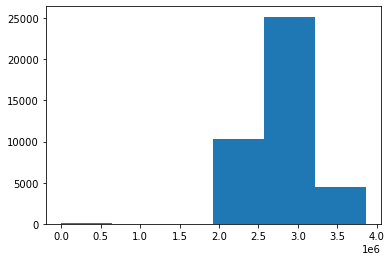

In [95]:
plt.hist('CallerNum',bins=6, data=smile)

## Restored to function counts

In [96]:
smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

No     8127
Yes    6149
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

## Counts by city

In [97]:
smile.CityName.value_counts()

Nashville        6456
Memphis          6304
Murfreesboro     2435
Cleveland        1718
Knoxville        1461
                 ... 
Sharps Chapel       1
Huron               1
Guys                1
Duluth              1
Lakeland            1
Name: CityName, Length: 387, dtype: int64

## Counts by zip

In [98]:
smile.PostalCode.value_counts()

37130.0    1119
37013.0     966
37207.0     934
37211.0     787
37115.0     751
           ... 
37409.0       1
37406.0       1
37370.0       1
37320.0       1
30741.0       1
Name: PostalCode, Length: 479, dtype: int64

## Counts by gender

In [99]:
smile['SMILE ON 60+ Demographic Information - Gender'].value_counts()

Female         25018
Male           14580
Transgender       12
Other              1
Name: SMILE ON 60+ Demographic Information - Gender, dtype: int64

## Counts by income level

In [100]:
smile['SMILE ON 60+ Demographic Information - Household Income Level'].value_counts()

$0 - $21 280     28983
$21246-$24280     5220
$24281-$27315     1600
$28806-$32920     1439
$32921-$37035      429
$36366-$41560      191
$41561-$46755      151
$50201-$56475       42
$43926-$50200       40
$51486-$58840       13
$76121-$85635       12
$59046-$67480       11
$58841-$66195        9
$84761-$95355        3
$66606-$76120        3
$67481-$75915        2
Name: SMILE ON 60+ Demographic Information - Household Income Level, dtype: int64

## Was a treatment plan developed?

In [101]:
smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'].value_counts()

Yes    15930
No      1098
Name: SMILE ON 60+ Treatment Plan - Was a treatment plan developed?, dtype: int64

## Is the treatment plan completed?

In [102]:
smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'].value_counts()

No     12431
Yes     5104
Name: SMILE ON 60+ Treatment Plan - Is the treatment plan completed?, dtype: int64

## Count of Sites

In [103]:
smile['SMILE ON 60+ Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    5802
Interfaith Dental Clinic - Murfreesboro                                                 3706
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1346
Keystone Dental Care Inc. - Johnson City                                                1032
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [104]:
smile['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)'].value_counts()

No Code - Denture step Mandibular: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20; No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20                                                                                                       3925
7140 - Extraction - erupted tooth or exposed root - 15                                                                                                                                                                                                                                                                                                                                    1710
No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20                                                                                                  

## finding duplicate patients 

In [122]:
#sort by CallDateAndTimeStart column
sort_by_calltime = smile.sort_values('CallDateAndTimeStart')
#create a dataframe of all of the first calls
first = sort_by_calltime[sort_by_calltime.duplicated(['CallerNum'])]
sort_by_callnum = first.sort_values('CallerNum')
sort_by_callnum.shape


(31324, 184)

In [124]:
pd.concat(g for _, g in smile.groupby('CallerNum') if len(g) > 1)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
29702,62945363,SMILE ON 60+ Clinical,NaN,5/15/2019 10:00,5/15/2019 11:00,60,-2,119473,NaN,NaN,...,NaN,NaN,Healing Hands Health Center - Bristol,NaN,NaN,NaN,Yes,NaN,NaN,NaN
40012,57949412,SMILE ON 60+ Clinical,NaN,7/1/2018 11:56,7/1/2018 11:59,3,-2,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40014,54186032,SMILE ON 60+ Clinical,NaN,6/28/2018 9:04,6/28/2018 9:05,1,-2,117266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40015,54184987,SMILE ON 60+ Clinical,NaN,6/28/2018 8:21,6/28/2018 8:23,2,-2,117266,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
40016,54184728,SMILE ON 60+ Registration,NaN,6/28/2018 8:09,6/28/2018 8:20,11,-2,117266,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,81334413,SMILE ON 60+ Registration,NaN,11/13/2020 14:30,11/13/2020 14:33,3,3856877,138548,NaN,NaN,...,NaN,NaN,TDH - Lawrence Co,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
9,81367388,SMILE ON 60+ Clinical,NaN,11/25/2020 11:46,11/25/2020 11:56,10,3858402,133280,NaN,NaN,...,Early care-within next several weeks,Yes,Christ Community Health Services- Raleigh,Provider Site,NaN,Yes,No,NaN,No,Yes
14,81360684,SMILE ON 60+ Registration,NaN,11/25/2020 9:33,11/25/2020 9:34,1,3858402,133280,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Raleigh,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
6,81371527,SMILE ON 60+ Clinical,NaN,11/25/2020 13:03,11/25/2020 13:04,1,3859184,127206,NaN,NaN,...,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,NaN,No,Yes


In [126]:
smile.drop_duplicates(subset= 'CallerNum' , keep='first', inplace=False, ignore_index=False)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39984,55109688,SMILE ON 60+ Registration,NaN,8/1/2018 11:19,8/1/2018 11:23,4,2385088,118843,NaN,NaN,...,NaN,NaN,NaN,Tooth Wisdom,NaN,NaN,NaN,NaN,NaN,NaN
39987,55109316,SMILE ON 60+ Registration,NaN,8/1/2018 11:08,8/1/2018 11:11,3,2385054,118820,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
39990,55108558,SMILE ON 60+ Registration,NaN,8/1/2018 10:48,8/1/2018 11:18,30,2385074,118843,NaN,NaN,...,NaN,NaN,NaN,Outreach,NaN,NaN,NaN,NaN,NaN,NaN
40003,55106455,SMILE ON 60+ Registration,NaN,8/1/2018 9:42,8/1/2018 9:47,5,2384897,118833,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
caller = smile["CallerNum"]
smile[caller.isin(caller[caller.duplicated()])].sort_values("CallDateAndTimeStart")



,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
35416,81094168,SMILE ON 60+ Registration,NaN,1/1/2019 10:44,1/1/2019 10:46,2,2421074,119492,NaN,NaN,...,NaN,NaN,Karis Dental Clinic - Cleveland,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
35418,81091398,SMILE ON 60+ Registration,NaN,1/1/2019 9:52,1/1/2019 9:52,0,2539088,119492,NaN,NaN,...,NaN,NaN,Karis Dental Clinic - Cleveland,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
35417,81091669,SMILE ON 60+ Registration,NaN,1/1/2019 9:57,1/1/2019 9:58,1,2440677,119492,NaN,NaN,...,NaN,NaN,Karis Dental Clinic - Cleveland,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
15680,70210167,SMILE ON 60+ Clinical,NaN,1/1/2020 12:21,1/1/2020 12:21,0,2533086,134403,NaN,NaN,...,NaN,NaN,Neighborhood Health - Cleveland Park/ Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
35140,59821165,SMILE ON 60+ Clinical,NaN,1/10/2019 10:08,1/10/2019 10:09,1,2391206,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,78611722,SMILE ON 60+ Clinical,NaN,9/9/2020 9:50,9/9/2020 9:50,0,3485293,141066,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,No,NaN,NaN,No,Yes
3563,78445338,SMILE ON 60+ Clinical,NaN,9/9/2020 9:52,9/9/2020 9:53,1,3545009,119491,NaN,NaN,...,NaN,NaN,Karis Dental Clinic - Cleveland,Provider Site,NaN,No,NaN,No,NaN,NaN
3561,78486729,SMILE ON 60+ Clinical,NaN,9/9/2020 9:57,9/9/2020 10:01,4,3683618,136529,NaN,NaN,...,No obvious problem,Yes,Matthew Walker Comprehensive Health Center Inc...,Provider Site,Not available,No,Yes,No,NaN,Yes
3562,78445500,SMILE ON 60+ Registration,NaN,9/9/2020 9:57,9/9/2020 9:58,1,2746801,123747,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#def stuff(df):
    #df = df[df.Time != '00:00:00' ]
    #df = df[df.Overall != 99999 ]
    #df['TimeDelta'] = pd.to_timedelta(df['Time'])
    #return df


In [115]:
duplicate = smile[smile.duplicated(['CallerNum'])] 
duplicate.head(25)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
8,81371365,SMILE ON 60+ Registration,NaN,11/25/2020 13:00,11/25/2020 13:03,3,3859184,127206,NaN,NaN,...,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
14,81360684,SMILE ON 60+ Registration,NaN,11/25/2020 9:33,11/25/2020 9:34,1,3858402,133280,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Raleigh,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
22,81336587,SMILE ON 60+ Clinical,NaN,11/24/2020 15:10,11/24/2020 15:10,0,3788688,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,No,Yes,NaN,NaN,NaN
28,81329992,SMILE ON 60+ Registration,NaN,11/24/2020 13:16,11/24/2020 13:18,2,3856533,133280,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Raleigh,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
45,81313563,SMILE ON 60+ Registration,NaN,11/24/2020 7:39,11/24/2020 7:47,8,3854985,123298,NaN,NaN,...,NaN,NaN,Knox County CAC/Office on Aging - Knoxville,Senior Center,NaN,NaN,NaN,NaN,NaN,NaN
49,81294882,SMILE ON 60+ Registration,NaN,11/23/2020 15:59,11/23/2020 15:59,0,2928034,133280,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Raleigh,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
61,81285068,SMILE ON 60+ Clinical,NaN,11/23/2020 13:13,11/23/2020 13:14,1,3620854,119492,NaN,NaN,...,NaN,NaN,Karis Dental Clinic - Cleveland,Provider Site,NaN,No,NaN,No,NaN,NaN
66,81280597,SMILE ON 60+ Registration,NaN,11/23/2020 12:02,11/23/2020 12:18,16,3853155,119513,NaN,NaN,...,NaN,NaN,Northeast Tennessee Community Health Centers I...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
70,81317602,SMILE ON 60+ Clinical,NaN,11/23/2020 9:26,11/23/2020 9:29,3,3853796,141066,NaN,NaN,...,Early care-within next several weeks,Yes,Church Health Center - Memphis,Provider Site,NaN,No,No,NaN,Yes,Yes
76,81270356,SMILE ON 60+ Registration,NaN,11/23/2020 9:02,11/23/2020 9:07,5,3852084,134393,NaN,NaN,...,NaN,NaN,Matthew Walker - Clarksville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
smile_3854985 = smile.loc[smile['CallerNum']=='3854985']
smile_3854985

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility


In [139]:
poverty = pd.read_csv('poverty_data_tn.csv')
poverty.head()

,#,Zip Code,Location,City,Population,% Poverty Level,National Rank
0,1,38126,"35.126608, -90.042212","Memphis, Tennessee","8,104",93.08%,#77
1,2,37408,"35.029019, -85.310872","Chattanooga, Tennessee","1,935",91.84%,#82
2,3,37410,"35.001899, -85.314220","Chattanooga, Tennessee","4,822",74.63%,#231
3,4,37915,"35.971478, -83.899274","Knoxville, Tennessee","5,564",67.16%,#356
4,5,38105,"35.150642, -90.033969","Memphis, Tennessee","8,976",66.11%,#376


In [147]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                609 non-null    int64 
 1   Zip Code         609 non-null    int64 
 2   City             609 non-null    object
 3   Population       609 non-null    object
 4   % Poverty Level  609 non-null    object
 5   National Rank    609 non-null    object
 6   lat              609 non-null    object
 7   lng              609 non-null    object
dtypes: int64(2), object(6)
memory usage: 38.2+ KB


## creating two columns for lat and long

In [140]:
poverty['lat'], poverty['lng'] = poverty['Location'].str.split(',', 1).str
poverty.head()


<ipython-input-140-a4721c2316ae>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  poverty['lat'], poverty['lng'] = poverty['Location'].str.split(',', 1).str


,#,Zip Code,Location,City,Population,% Poverty Level,National Rank,lat,lng
0,1,38126,"35.126608, -90.042212","Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212
1,2,37408,"35.029019, -85.310872","Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872
2,3,37410,"35.001899, -85.314220","Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220
3,4,37915,"35.971478, -83.899274","Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274
4,5,38105,"35.150642, -90.033969","Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969


In [141]:
poverty = poverty.drop(columns = ['Location'])

In [142]:
poverty

,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220
3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274
4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969
...,...,...,...,...,...,...,...,...
604,605,37744,"Greeneville, Tennessee",372,0.00%,"#31,490",36.182885,-82.740218
605,606,38021,"Crockett Mills, Tennessee",88,0.00%,"#31,492",35.877711,-89.172962
606,607,38347,"Jacks Creek, Tennessee",373,0.00%,"#31,649",35.464395,-88.497750
607,608,38542,"Allred, Tennessee",42,0.00%,"#31,651",36.315028,-85.205336


In [151]:
poverty = poverty.rename(columns = {'Zip Code':'zip','% Poverty Level':'poverty_level','National Rank':'national_rank'})
poverty.head()

,#,zip,City,Population,poverty_level,national_rank,lat,lng
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220
3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274
4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969


In [143]:
poverty.to_csv('poverty_tn.csv')



In [144]:
#poverty.set_index("Zip Code", inplace=True)
#poverty.head()



In [152]:
poverty_37130 = poverty[poverty.zip =='37130']
poverty_37130

#df[df['id'] == '48']

,#,zip,City,Population,poverty_level,national_rank,lat,lng


In [153]:
poverty_37013 = poverty.loc[poverty['zip']=='37013']
poverty_37013

,#,zip,City,Population,poverty_level,national_rank,lat,lng


In [154]:
poverty_37207 = poverty.loc[poverty['zip']=='37207']
poverty_37207

,#,zip,City,Population,poverty_level,national_rank,lat,lng


In [155]:
poverty_37211 = poverty.loc[poverty['zip']=='37211']
poverty_37211

,#,zip,City,Population,poverty_level,national_rank,lat,lng


In [156]:
poverty_37115 = poverty.loc[poverty['zip']=='37115']
poverty_37115

,#,zip,City,Population,poverty_level,national_rank,lat,lng


In [213]:
zipcodes = gpd.read_file('tn_zipcodes.json')

In [157]:
poverty['geometry'] = poverty.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
poverty.head(3)


,#,zip,City,Population,poverty_level,national_rank,lat,lng,geometry
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221200000001 35.126608)
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.310872 35.029019)
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31422000000001 35.001899)


In [165]:
poverty.shape

(609, 8)

In [171]:
poverty.head()


,zip,City,Population,poverty_level,national_rank,lat,lng,geometry
0,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221200000001 35.126608)
1,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.310872 35.029019)
2,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31422000000001 35.001899)
3,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274,POINT (-83.89927400000001 35.971478)
4,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969,POINT (-90.033969 35.150642)


In [190]:
poverty.crs = "EPSG:4326"
print(poverty.crs)

EPSG:4326


In [202]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   zip            609 non-null    int64 
 1   City           609 non-null    object
 2   Population     609 non-null    object
 3   poverty_level  609 non-null    object
 4   national_rank  609 non-null    object
 5   lat            609 non-null    object
 6   lng            609 non-null    object
 7   geometry       609 non-null    object
dtypes: int64(1), object(7)
memory usage: 38.2+ KB


In [204]:
poverty = gpd.GeoDataFrame(poverty)
poverty.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   zip            609 non-null    int64   
 1   City           609 non-null    object  
 2   Population     609 non-null    object  
 3   poverty_level  609 non-null    object  
 4   national_rank  609 non-null    object  
 5   lat            609 non-null    object  
 6   lng            609 non-null    object  
 7   geometry       609 non-null    geometry
dtypes: geometry(1), int64(1), object(6)
memory usage: 38.2+ KB


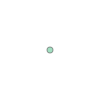

In [205]:
poverty.loc[0,'geometry']

<AxesSubplot:>

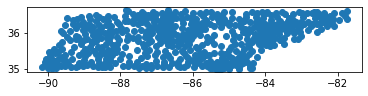

In [206]:
poverty.plot()

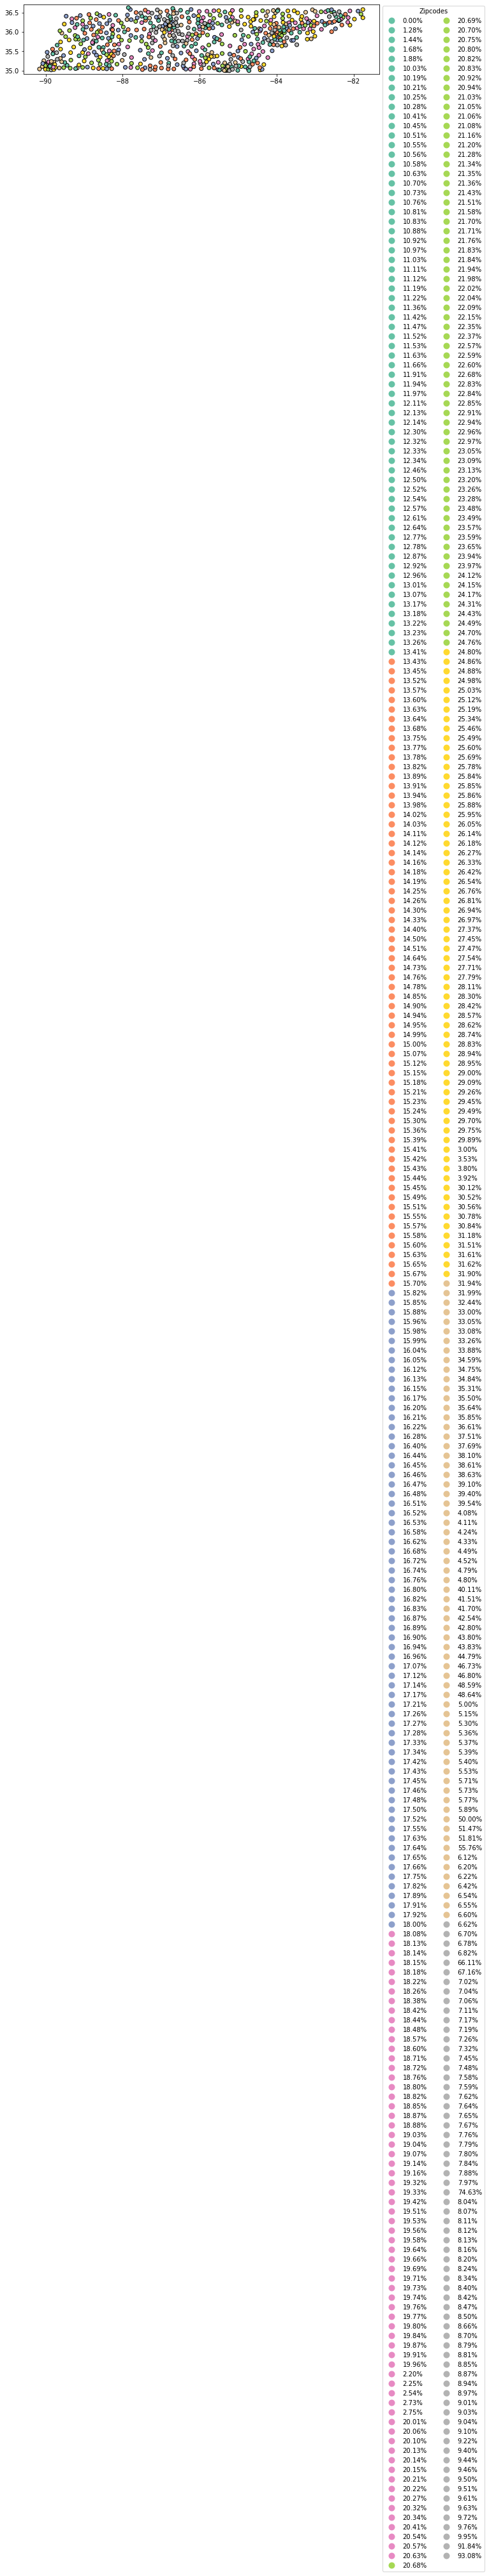

In [210]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

poverty.plot(column = 'poverty_level', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [194]:
poverty.crs

'EPSG:4326'

In [214]:
poverty_map = folium.Map([36.1627, -86.7816], zoom_start=7)

marker_cluster = MarkerCluster().add_to(poverty_map)

for row_index, row_values in poverty.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['poverty_level'])
    icon=folium.Icon(color='beige', icon='percent', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(poverty_map)
    
poverty_map

In [ ]:
-